In [1]:
import numpy as np
import json

from ahyper import utils, annotated_hypergraph, observables
from matplotlib import pyplot as plt

import pandas as pd

import numpy as np
import networkx as nx

In [2]:
with open('data/enron_hypergraph_annotated.json') as file:
    data = json.load(file)

roles = ['cc', 'from', 'to']

A = annotated_hypergraph.AnnotatedHypergraph.from_records(data, roles)
A.remove_degeneracies(precedence = {'from' : 1, 'to' : 2, 'cc' : 3})
A.remove_singletons()

Removed 1246 node-edge incidences
Removed 901 singletons.


In [3]:
R = np.array([[0.0, 0.0, 0.0], 
              [0.25, 0.0, 1.0], 
              [0.0, 0.0, 0.0]])

R1 = np.ones((3,3))

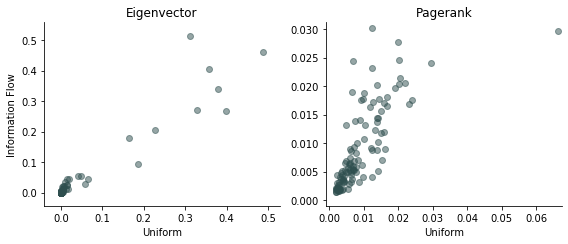

In [42]:
fig = plt.figure(figsize = (8, 3.5))

A.assign_role_interaction_matrix(R)
PR = observables.pagerank_centrality(A, weight = 'weight')
pr = [PR[i] for i in range(A.n)]

EIG = observables.eigenvector_centrality(A, weight = 'weight')
eig = [EIG[i] for i in range(A.n)]

A.assign_role_interaction_matrix(R1)
PR1 = observables.pagerank_centrality(A, weight = 'weight')
pr1 = [PR1[i] for i in range(A.n)]

EIG1 = observables.eigenvector_centrality(A, weight = 'weight')
eig1 = [EIG1[i] for i in range(A.n)]

ax1 = fig.add_subplot(121)
ax1.scatter(eig, eig1, c = 'darkslategrey', alpha = .5)
ax1.set(title = 'Eigenvector')
plt.xlabel('Uniform')
plt.ylabel('Information Flow')

ax2 = fig.add_subplot(122)
ax2.scatter(pr, pr1, c = 'darkslategrey', alpha = .5)
ax2.set(ylim = (-0.001,max(pr1)+.001), xlim = (-0.001, max(pr)+.001))

ax2.set(title = 'Pagerank')
plt.xlabel('Uniform')

for ax in [ax1, ax2]:
    for loc in ['right', 'top']:
        ax.spines[loc].set_visible(False)

plt.tight_layout()

plt.savefig('fig/centrality_dependence.pdf')

In [45]:
np.argmax(np.array(pr1)), np.argmax(np.array(pr))

(103, 44)

In [46]:
np.argmax(np.array(eig1)), np.argmax(np.array(eig))

(103, 63)